In [1]:
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt

In [2]:
dataset_name = "gasoline_prices"

In [3]:
input_fname = "extracted_gasoline_data.csv"
output_dir = f'./../../processed/{dataset_name}/'
outp_fname = os.path.join(output_dir, f'{dataset_name}.csv')
outp_fig_fname = os.path.join(output_dir, f'{dataset_name}.png')

# Read Data

In [4]:
data = pd.read_csv(input_fname, parse_dates=['Date'])
data.head()

,Date,Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. All Grades Conventional Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. All Grades Reformulated Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. Regular Conventional Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. Regular Reformulated Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. Midgrade All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. Midgrade Conventional Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. Midgrade Reformulated Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. Premium All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. Premium Conventional Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. Premium Reformulated Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. No 2 Diesel Retail Prices (Dollars per Gallon)
0,1994-11-28,1.117,1.175,1.259,1.105,1.082,1.149,1.197,1.174,1.249,1.303,1.270,1.351,1.126
1,1994-12-05,1.127,1.143,1.254,1.103,1.075,1.169,1.197,1.167,1.272,1.301,1.260,1.370,1.123
2,1994-12-12,1.131,1.118,1.231,1.095,1.064,1.167,1.188,1.156,1.268,1.288,1.244,1.363,1.114
3,1994-12-19,1.134,1.099,1.216,1.087,1.056,1.167,1.179,1.147,1.262,1.279,1.233,1.360,1.109
4,1994-12-26,1.125,1.088,1.213,1.077,1.044,1.165,1.171,1.136,1.265,1.270,1.222,1.358,1.106


# Prepare Data

## Strip extra white space

In [5]:
# Strip surrounding whitespace and replace multiple spaces with a single space
data.columns = data.columns.str.strip().str.replace('\s+', ' ', regex=True)
data.columns

Index(['Date',
       'Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)',
       'Weekly U.S. All Grades Conventional Retail Gasoline Prices (Dollars per Gallon)',
       'Weekly U.S. All Grades Reformulated Retail Gasoline Prices (Dollars per Gallon)',
       'Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)',
       'Weekly U.S. Regular Conventional Retail Gasoline Prices (Dollars per Gallon)',
       'Weekly U.S. Regular Reformulated Retail Gasoline Prices (Dollars per Gallon)',
       'Weekly U.S. Midgrade All Formulations Retail Gasoline Prices (Dollars per Gallon)',
       'Weekly U.S. Midgrade Conventional Retail Gasoline Prices (Dollars per Gallon)',
       'Weekly U.S. Midgrade Reformulated Retail Gasoline Prices (Dollars per Gallon)',
       'Weekly U.S. Premium All Formulations Retail Gasoline Prices (Dollars per Gallon)',
       'Weekly U.S. Premium Conventional Retail Gasoline Prices (Dollars per Gallon)',


In [6]:
series_col = "SeriesId"
epoch_col = 'Date'
epoch_label = "Week Num"
time_col = 'Date'
value_col = 'Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon)'
exog_cols = [
       'Weekly U.S. All Grades Conventional Retail Gasoline Prices (Dollars per Gallon)',
       'Weekly U.S. All Grades Reformulated Retail Gasoline Prices (Dollars per Gallon)',
       'Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon)',
       'Weekly U.S. Regular Conventional Retail Gasoline Prices (Dollars per Gallon)',
       'Weekly U.S. Regular Reformulated Retail Gasoline Prices (Dollars per Gallon)',
       'Weekly U.S. Midgrade All Formulations Retail Gasoline Prices (Dollars per Gallon)',
       'Weekly U.S. Midgrade Conventional Retail Gasoline Prices (Dollars per Gallon)',
       'Weekly U.S. Midgrade Reformulated Retail Gasoline Prices (Dollars per Gallon)',
       'Weekly U.S. Premium All Formulations Retail Gasoline Prices (Dollars per Gallon)',
       'Weekly U.S. Premium Conventional Retail Gasoline Prices (Dollars per Gallon)',
       'Weekly U.S. Premium Reformulated Retail Gasoline Prices (Dollars per Gallon)',
       'Weekly U.S. No 2 Diesel Retail Prices (Dollars per Gallon)']

In [7]:
len(exog_cols)

12

## Add Series Id

In [8]:
if series_col not in data:
    data.insert(0, "SeriesId", "gasoline_prices")
data.head()

,SeriesId,Date,Weekly U.S. All Grades All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. All Grades Conventional Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. All Grades Reformulated Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. Regular All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. Regular Conventional Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. Regular Reformulated Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. Midgrade All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. Midgrade Conventional Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. Midgrade Reformulated Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. Premium All Formulations Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. Premium Conventional Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. Premium Reformulated Retail Gasoline Prices (Dollars per Gallon),Weekly U.S. No 2 Diesel Retail Prices (Dollars per Gallon)
0,gasoline_prices,1994-11-28,1.117,1.175,1.259,1.105,1.082,1.149,1.197,1.174,1.249,1.303,1.270,1.351,1.126
1,gasoline_prices,1994-12-05,1.127,1.143,1.254,1.103,1.075,1.169,1.197,1.167,1.272,1.301,1.260,1.370,1.123
2,gasoline_prices,1994-12-12,1.131,1.118,1.231,1.095,1.064,1.167,1.188,1.156,1.268,1.288,1.244,1.363,1.114
3,gasoline_prices,1994-12-19,1.134,1.099,1.216,1.087,1.056,1.167,1.179,1.147,1.262,1.279,1.233,1.360,1.109
4,gasoline_prices,1994-12-26,1.125,1.088,1.213,1.077,1.044,1.165,1.171,1.136,1.265,1.270,1.222,1.358,1.106


# Visualize Data

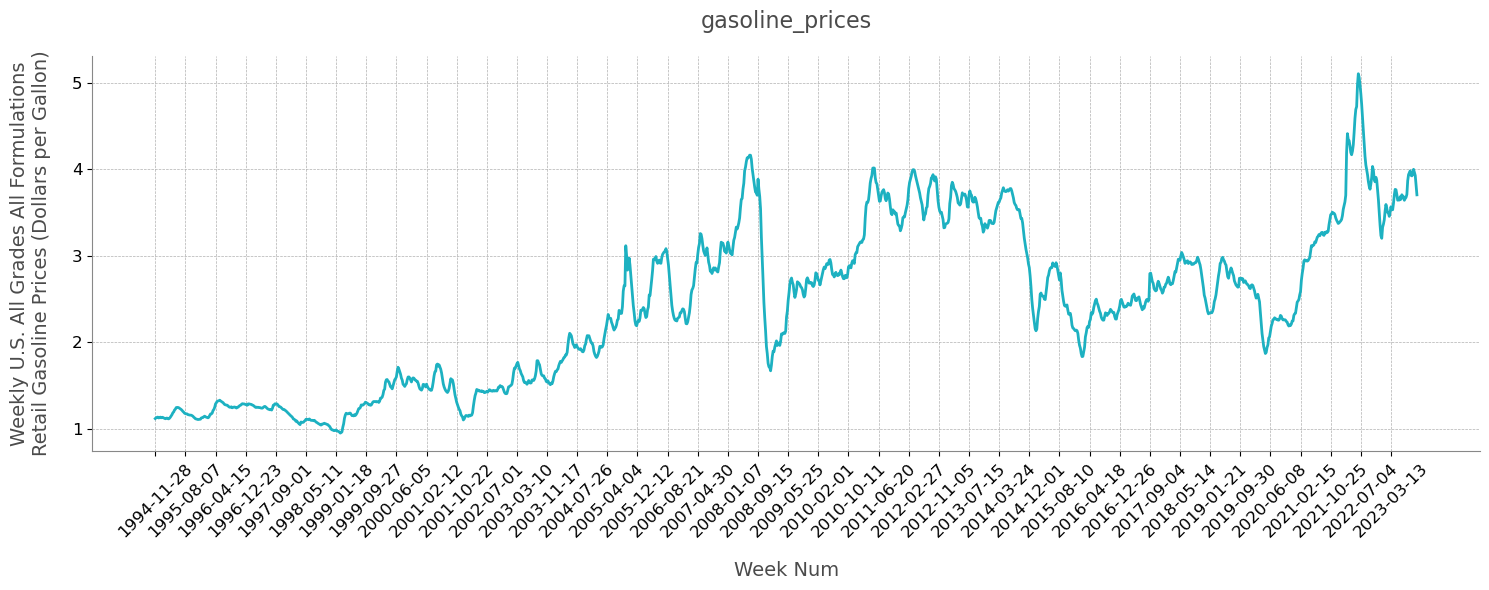

In [9]:
# Adjusting the spacing between axis titles and tick labels
plt.figure(figsize=(15, 6))

# Set title and labels with a medium contrast
font = {
#     'family': 'serif',
    'color':  '#4B4B4B',
    'weight': 'normal'
}

# Plotting the data
plt.plot(data[epoch_col], data[value_col], color='#1db1c1', linewidth=2)

# Adjusting the title and labels with increased spacing
plt.xlabel(epoch_label, fontsize=14, fontdict=font, labelpad=15)

import textwrap
# Wrap this text
wrapped_ylabel = textwrap.fill(value_col, width=45)  # Adjust width as needed

plt.ylabel(wrapped_ylabel, fontsize=14, fontdict=font, labelpad=15)
plt.title(dataset_name, fontsize=16, fontdict=font, pad=20)

# Adjusting x and y ticks
plt.xticks(data[epoch_col][::36], rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Grid and spines adjustments
plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='#B0B0B0')
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#888888')
ax.spines['bottom'].set_color('#888888')

plt.tight_layout()
plt.savefig(outp_fig_fname)
plt.show()

# Save Main Data File

In [10]:
if time_col: 
    all_cols = [series_col, time_col, value_col] + exog_cols
else: 
    all_cols = [series_col, value_col] + exog_cols
data.sort_values(by=[series_col, epoch_col], inplace=True)
data[all_cols].to_csv(outp_fname, index=False, float_format="%.3f")